In [2]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from numpy.polynomial.polynomial import polyfit
from scipy import signal
from scipy.stats import norm

import matplotlib

import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import pyplot
from matplotlib import colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



In [1]:
FLDR_AGRIF='/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/'
coord_name_36='domain_cfg.nc'
coord_name_108='1_domain_cfg.nc'


In [3]:
coord_AGRIF_36 = xr.open_dataset(FLDR_AGRIF + coord_name_36, drop_variables={"x", "y",})
coord_AGRIF_108 = xr.open_dataset(FLDR_AGRIF + coord_name_108, drop_variables={"x", "y",})




In [29]:
lat108 = coord_AGRIF_108.gphit.squeeze()
lon108 = coord_AGRIF_108.glamt.squeeze()

lat36 = coord_AGRIF_36.gphit.squeeze()
lon36 = coord_AGRIF_36.glamt.squeeze()
bat108 = coord_AGRIF_108.bathy_metry.squeeze()


f = 2 * 7.27 * 10e-5 * np.sin(np.radians(lat108))


In [9]:
print(np.nanmean(f))

0.0009986962921790053


In [10]:
2 * 7.2921150 * 10e-5 * np.sin(np.radians(45))

0.0010312607931384282

0.001

In [16]:
rossby_r = np.zeros(bat108.shape)


rossby_r = ((9.81*bat108)**(0.5)) / f

rossby_r = np.where(bat108 == 0,np.nan,rossby_r )

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


NameError: name 'lon' is not defined

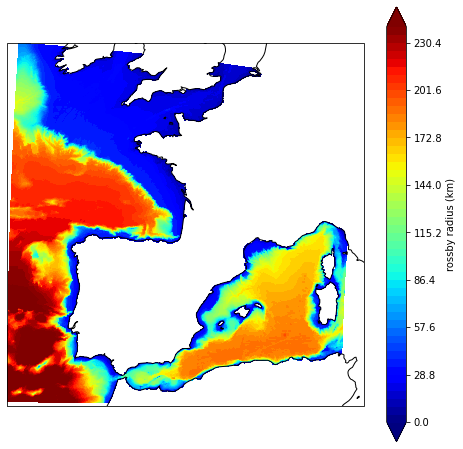

In [86]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon108, lat108 ,rossby_r / 1000,levels=np.linspace(0,240,51) , cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='rossby radius (km)')
im1 = plt.contour(lon, lat, var_IBI_AGRIF, cmap=None,levels=np.linspace(-1,1,5), transform=ccrs.PlateCarree(),linewidths=1.5,colors=('k','k','k','b','b','b'))

plt.savefig('rossby_radius.png')

# plt.close()

In [26]:
rossby_r_orcafile_eNEATL36 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/rossby_r_orca12_on_eNEATL36.nc')
rossby_r_orcafile_AGRIF = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/rossby_r_orca12_on_AGRIF.nc')

In [34]:
rossby_r_eNEATL36 = rossby_r_orcafile_eNEATL36.sorosrad.squeeze()
rossby_r_AGRIF = rossby_r_orcafile_AGRIF.sorosrad.squeeze()
rossby_r_eNEATL36 = rossby_r_eNEATL36.where(rossby_r_eNEATL36.values < 500000, np.nan)
rossby_r_AGRIF = rossby_r_AGRIF.where(rossby_r_AGRIF.values < 500000, np.nan)

In [90]:
imin_IBI_AGRIF=220
imax_IBI_AGRIF=1073
jmin_IBI_AGRIF=350
jmax_IBI_AGRIF=1245
valeur_cadre=1.
var_IBI_AGRIF=np.zeros(rossby_r_eNEATL36.shape)
var_IBI_AGRIF[jmin_IBI_AGRIF-1:jmin_IBI_AGRIF+1,imin_IBI_AGRIF:imax_IBI_AGRIF]=valeur_cadre
var_IBI_AGRIF[jmax_IBI_AGRIF-1:jmax_IBI_AGRIF+1,imin_IBI_AGRIF:imax_IBI_AGRIF]=valeur_cadre
var_IBI_AGRIF[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF-1:imin_IBI_AGRIF+1]=valeur_cadre
var_IBI_AGRIF[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imax_IBI_AGRIF-1:imax_IBI_AGRIF+1]=valeur_cadre


In [89]:
rossby_r_eNEATL36

<xarray.DataArray 'sorosrad' (y: 1894, x: 1294)>
array([[36575.51 , 36545.93 , 36516.344, ...,       nan,       nan,
              nan],
       [36542.28 , 36521.56 , 36500.836, ...,       nan,       nan,
              nan],
       [36509.062, 36497.203, 36485.336, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2007-07-02T01:47:44
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
Dimensions without coordinates: y, x
Attributes:
    long_name:         Rossby_Radius
    units:             m
    short_name:        sorosrad
    iweight:           1
    online_operation:  N/A
    savelog10:         0.0

In [49]:
e1t_108 = coord_AGRIF_108.e1t.squeeze()
e2t_108 = coord_AGRIF_108.e2t.squeeze()

e1t_36 = coord_AGRIF_36.e1t.squeeze()
e2t_36 = coord_AGRIF_36.e2t.squeeze()

eff_reso_108 = np.sqrt(e1t_108**2 + e2t_108**2)

eff_reso_36 = np.sqrt(e1t_36**2 + e2t_36**2)

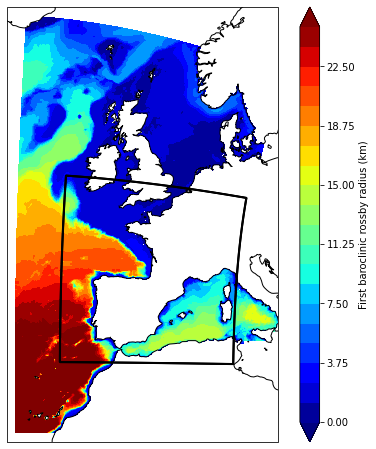

In [103]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False
# ax.set_extent((-14, 11.0, 35.0, 53))

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon36, lat36 ,rossby_r_eNEATL36 / 1000,levels=np.linspace(0,25,21) , cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='First baroclinic rossby radius (km)')

im1 = plt.contour(lon36, lat36, var_IBI_AGRIF, cmap=None,levels=np.linspace(-1,1,5), transform=ccrs.PlateCarree(),linewidths=1.5,colors=('k','k','k','k','k','k'))
ax.set_extent((-21.0, 16.0, 25.0, 63.5))


plt.savefig('rossby_radius_36.png')

# plt.close()

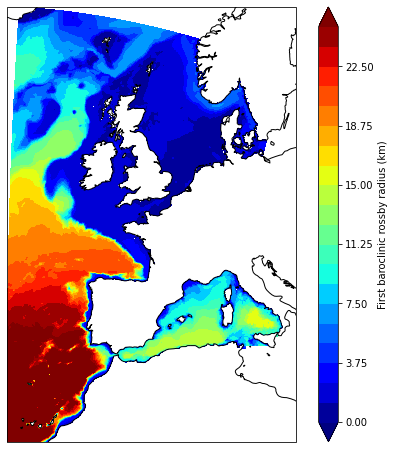

In [104]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False
# ax.set_extent((-14, 11.0, 35.0, 53))

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon36, lat36 ,rossby_r_eNEATL36 / 1000,levels=np.linspace(0,25,21) , cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='First baroclinic rossby radius (km)')

# im1 = plt.contour(lon36, lat36, var_IBI_AGRIF, cmap=None,levels=np.linspace(-1,1,5), transform=ccrs.PlateCarree(),linewidths=1.5,colors=('k','k','k','k','k','k'))
# ax.set_extent((-21.0, 16.0, 25.0, 63.5))


plt.savefig('rossby_radius_36_nonestarea.png')

# plt.close()

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


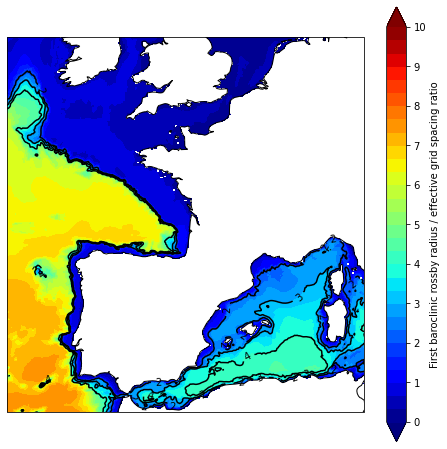

In [83]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False
ax.set_extent((-14, 11.0, 35.0, 53))

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon36, lat36 , rossby_r_eNEATL36 / eff_reso_36,levels=np.linspace(0,10,31) , cmap="jet",transform=ccrs.PlateCarree(),extend='both')

plt.colorbar(im1,ticks=np.linspace(0,10,11),label='First baroclinic rossby radius / effective grid spacing ratio')

im2 = plt.contour(lon36, lat36,rossby_r_eNEATL36.values / eff_reso_36.values, levels=[2, 3, 4], colors='k',transform=ccrs.PlateCarree() )
plt.clabel(im2, inline=True, fontsize=10,fmt='%0.0f')

plt.savefig('ratio_rossby_radius_eNEATL36.png')

# plt.close()

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


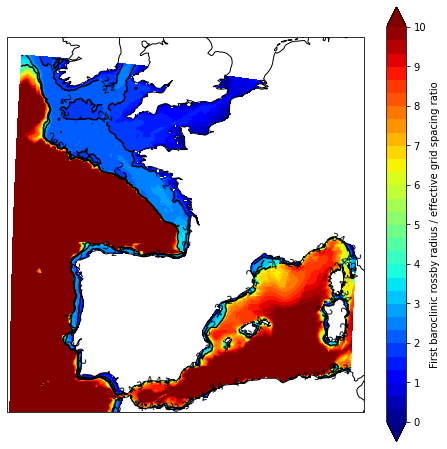

In [84]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False
ax.set_extent((-14, 11.0, 35.0, 53))

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon108, lat108 , rossby_r_AGRIF / eff_reso_108,levels=np.linspace(0,10,31) , cmap="jet",transform=ccrs.PlateCarree(),extend='both')

im2 = plt.contour(lon108, lat108 , rossby_r_AGRIF / eff_reso_108, levels=[2, 3, 4], colors='k',transform=ccrs.PlateCarree() )
plt.clabel(im2, inline=True, fontsize=10,fmt='%0.0f')


plt.colorbar(im1,ticks=np.linspace(0,10,11),label='First baroclinic rossby radius / effective grid spacing ratio')

plt.savefig('ratio_rossby_radius_AGRIF.png')

# plt.close()